# Team Tyrell - Decade Predictor
This explores various ML classifier methods to predict music genre a given song/track.  
-Uses SKLearn's Random Forest Classifier and evaluates accuracy and results  
-Also considers a K Nearest Neighbor model  
-Exports the RF model and the scaler for use in other app  
***

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
import seaborn as sns

import joblib


### Original Dataset

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
musicData = pd.read_csv("Resources/music.csv")

#define the genreIndex
genreIndex=['Acoustic/Folk', 
           'Blues',
           'Bollywood',
           'Country',
           'HipHop',
           'Indie Alt',
           'Instrumental',
           'Metal',
           'Pop',
           'Rock']



In [3]:
musicData.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
# Drop non-contributing ID columns
musicDF = musicData.drop(columns=['Artist Name', 'Track Name'])


# Optional: Change Artist Name and Track Name to string
#cat_col = ['Artist Name','Track Name']

#for i in cat_col:
#    data[i] = data[i].astype('str') 


# musicDF

In [5]:
# Count the number of NaN values in each column
nan_counts = musicDF.isna().sum()
#nan_counts

In [6]:
# Count the number of rows with at least one NaN value
rows_with_nan = musicDF.isna().any(axis=1).sum()
# rows_with_nan

In [7]:
# Option1: Drop instrumentalness for now since there are many NaN's- try to figure out how to populate NaN's later?  
# musicDF = musicDF.drop(columns=['Popularity', 'key', 'instrumentalness'])

In [8]:
# Option2: drop samples with NaN values
#musicDF = musicDF.dropna()

In [9]:
# Option3: imput missing with zero
musicDF = musicDF.fillna(0)

In [10]:
# musicDF.shape

In [11]:
# the Random Forest Confusion Matrix showed that the classifier had a hard time predicted the difference between "Alt_Music_1" and "Indie Alt_6".  Combining them into "Indie Alt_6"
# Replace values in 'Class' column
musicDF['Class'] = musicDF['Class'].replace(1, 6)

### Split Data Into Features and our Label (genre)

In [12]:
# Separate the data into labels (Class = genre) and features/attributes

# Separate the y variable, the labels
y = musicDF["Class"].values


# Separate the X variable, the features
X = musicDF.drop("Class", axis=1).values

In [13]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [14]:
# import the StandardScaler and scale the data
from sklearn.preprocessing import StandardScaler

# make the instance of the standard scaler
scaler = StandardScaler()

# fit the scaler onto the data
X_scaler = scaler.fit(X_train)

# scale the x train and test using .transform function
xTrainScaled = X_scaler.transform(X_train)
xTestScaled = X_scaler.transform(X_test)

### Random Forest Classifier Modelling

In [15]:
# import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# create the random forest classifier model
rfModel = RandomForestClassifier(n_estimators=500, random_state=80)

# fit the model onto our scaled X training data and the trained y data
rfModel = rfModel.fit(xTrainScaled, y_train)

In [16]:
# make the predictions using the testing data
predictedValues = rfModel.predict(xTestScaled)

### Evaluate Accuracy

In [17]:
# import the modules for the confusion matrix, accuracy score, and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [18]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"Random Forest Classifier Accuracy Score: {(accuracyScore*100):.2f}%")

Random Forest Classifier Accuracy Score: 56.66%


In [19]:
# rf confusion matrix; Predicted is columns, Actuals are rows
rfConfusionData = confusion_matrix(y_test, predictedValues)

rfConfusionDF = pd.DataFrame(
    rfConfusionData,
    index=genreIndex,
    columns=genreIndex
)
#rfConfusionDF

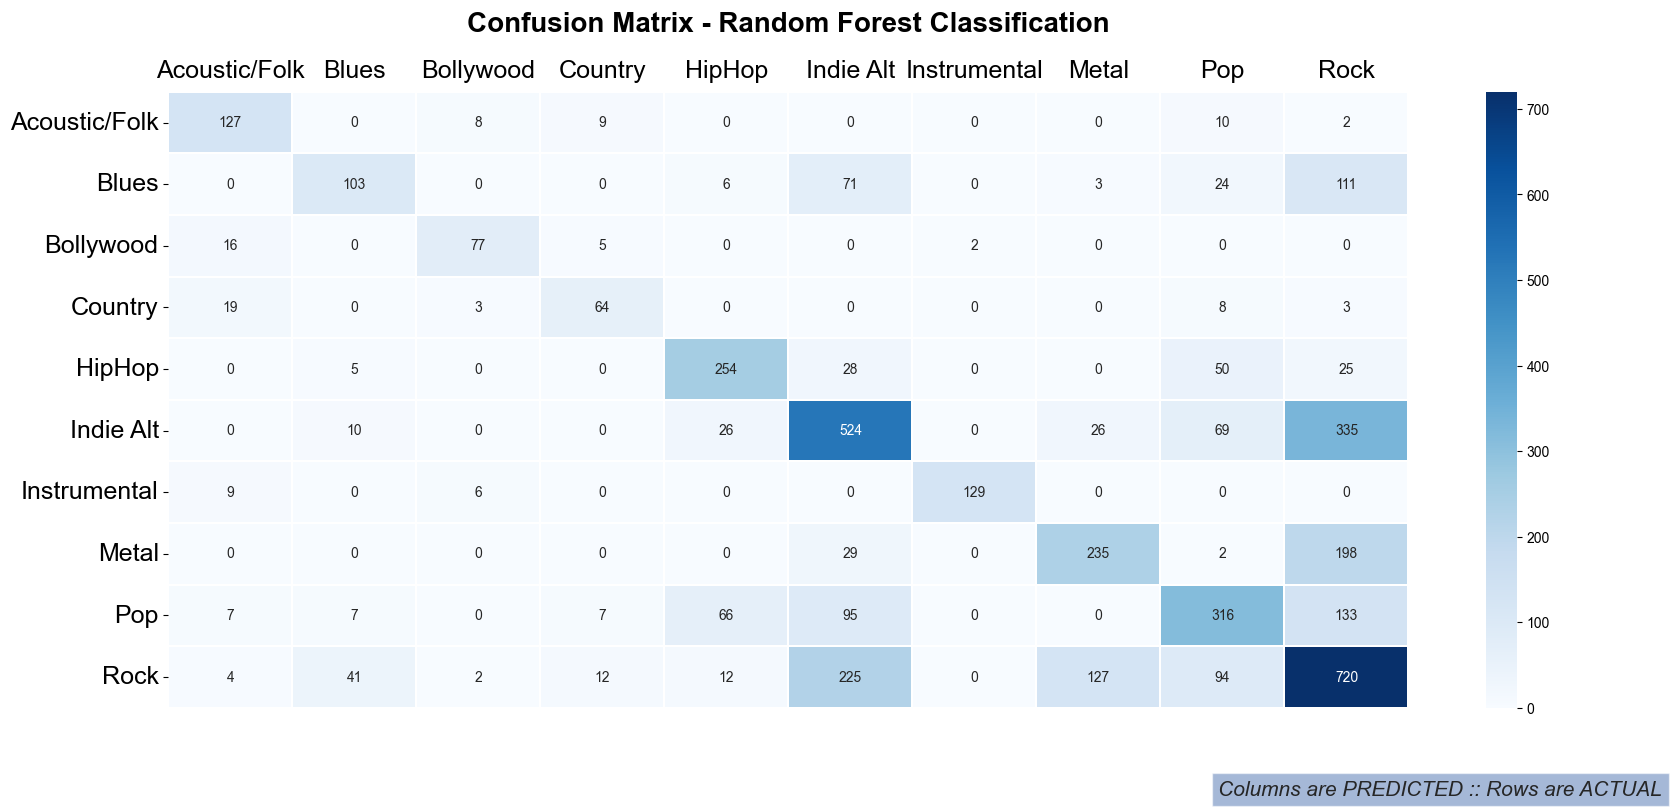

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot heatmap for confusion matrix
plt.figure(figsize=(20,8))  
plt.title(f"Confusion Matrix - Random Forest Classification", fontsize=20, weight = 'bold', pad=20)

sns.heatmap(rfConfusionDF, cmap ='Blues', linewidths = 0.30, annot = True, fmt='.0f')
sns.set(font_scale=1.2)
plt.tick_params(axis='both', which='major', labelsize=18, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.figtext(.65, 0.001, "Columns are PREDICTED :: Rows are ACTUAL", fontsize=15, style = 'italic', bbox={"alpha":0.5, "pad":5})

plt.show()
plt.tight_layout()

In [21]:
# classification report
print("CLASSIFICATION REPORT - RANDOM FOREST")
print(classification_report(y_test, predictedValues, target_names = genreIndex))

CLASSIFICATION REPORT - RANDOM FOREST
               precision    recall  f1-score   support

Acoustic/Folk       0.70      0.81      0.75       156
        Blues       0.62      0.32      0.43       318
    Bollywood       0.80      0.77      0.79       100
      Country       0.66      0.66      0.66        97
       HipHop       0.70      0.70      0.70       362
    Indie Alt       0.54      0.53      0.53       990
 Instrumental       0.98      0.90      0.94       144
        Metal       0.60      0.51      0.55       464
          Pop       0.55      0.50      0.52       631
         Rock       0.47      0.58      0.52      1237

     accuracy                           0.57      4499
    macro avg       0.66      0.63      0.64      4499
 weighted avg       0.58      0.57      0.57      4499



In [22]:
# calculate feature importance 
importantFeatures = rfModel.feature_importances_
featureNames = musicDF.drop("Class", axis=1).columns

# sort the features by their importance, zip them, and display them
zippedFeatures = sorted(zip(importantFeatures, featureNames), reverse=True)
importantFeaturesDF = pd.DataFrame(zippedFeatures)
importantFeaturesDF.set_index(importantFeaturesDF[1], inplace=True)
importantFeaturesDF.drop(columns=1, inplace=True)
importantFeaturesDF.rename(columns={0: 'Feature Importances'}, inplace=True)
# importantFeaturesDF

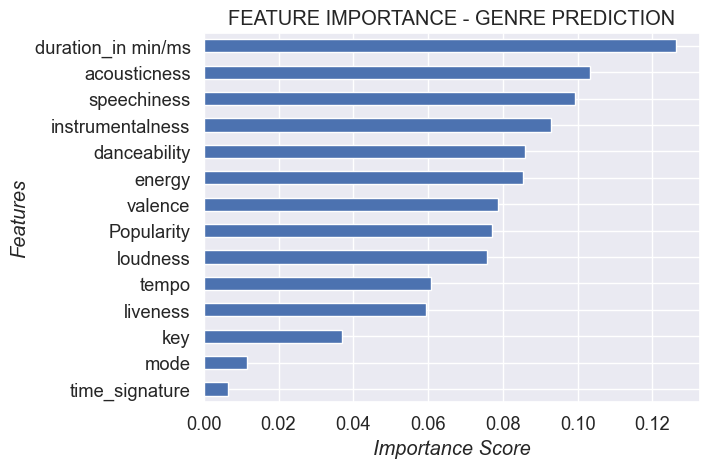

In [38]:
# Plot feature importances as horizontal bar chart
importantFeaturesDFSorted = importantFeaturesDF.sort_values(by="Feature Importances")

fig, ax = plt.subplots()
importantFeaturesDFSorted.plot.barh(ax=ax, legend=False)
ax.set_title('FEATURE IMPORTANCE - GENRE PREDICTION')
ax.set_xlabel('Importance Score', fontstyle='italic')
ax.set_ylabel('Features', fontstyle='italic')
plt.show()

### Try a Logistic Regression Model with the Original Data

In [24]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifierModel = LogisticRegression(solver='lbfgs', random_state=1)
classifierModel

LogisticRegression(random_state=1)

In [25]:
# Fit the model using training data
classifierModel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [26]:
# validate the model using the test data - use .score() function to get the accuracy
model_score_train = classifierModel.score(X_train, y_train)
print("Model Score (Accuracy) - Trained Data:", model_score_train)

Model Score (Accuracy) - Trained Data: 0.2926576276209528


In [27]:
model_score_test = classifierModel.score(X_test, y_test)
print("Logistic Regression Model Score (Accuracy):", model_score_test)

Logistic Regression Model Score (Accuracy): 0.29984440986885974


### Try K Nearest Neighbor (KNN) Classifyier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xTrainScaled, y_train)


KNeighborsClassifier(n_neighbors=10)

In [29]:
predictedValues = knn.predict(xTestScaled)

In [30]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"KNN Model Accuracy Score: {(accuracyScore*100):.2f}%")

KNN Model Accuracy Score: 48.08%


### Export the Model and Scaler

In [31]:
joblib.dump(rfModel, 'rfModel_genre.joblib')
joblib.dump(scaler, 'scaler_genre.joblib')

['scaler_genre.joblib']